Cognifyz

Level 3
Task: 1
Predictive Modeling

Build a regression model to predict theaggregate rating of a restaurant based onavailable features.
Split the dataset into training and testing setsand evaluate the model's performance usingappropriate metrics.
Experiment with different algorithms (e.g.,linear regression, decision trees, randomforest) and compare their performance.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Load your dataset
df = pd.read_csv('/content/sample_data/Dataset .csv')

In [ ]:
# : Explore the dataset

df


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


In [ ]:
df['Restaurant Name Length'] = df['Restaurant Name'].apply(len)
df['Address Length'] = df['Address'].apply(len)
df['Has Table Booking'] = df['Has Table booking'].map({'Yes': 1, 'No': 0})
df['Has Online Delivery'] = df['Has Online delivery'].map({'Yes': 1, 'No': 0})


In [ ]:
X = df[['Average Cost for two', 'Restaurant Name Length', 'Address Length', 'Has Table Booking', 'Has Online Delivery']]
y = df['Aggregate rating']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)


LinearRegression()

In [ ]:
decision_tree_reg = DecisionTreeRegressor(random_state=42)
decision_tree_reg.fit(X_train, y_train)


DecisionTreeRegressor(random_state=42)

In [ ]:
random_forest_reg = RandomForestRegressor(random_state=42)
random_forest_reg.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [ ]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return mse, r2


In [ ]:
linear_reg_mse, linear_reg_r2 = evaluate_model(linear_reg, X_test, y_test)
decision_tree_mse, decision_tree_r2 = evaluate_model(decision_tree_reg, X_test, y_test)
random_forest_mse, random_forest_r2 = evaluate_model(random_forest_reg, X_test, y_test)

print(f'Linear Regression - MSE: {linear_reg_mse}, R-squared: {linear_reg_r2}')
print(f'Decision Tree - MSE: {decision_tree_mse}, R-squared: {decision_tree_r2}')
print(f'Random Forest - MSE: {random_forest_mse}, R-squared: {random_forest_r2}')


Linear Regression - MSE: 2.09781715516153, R-squared: 0.07833185313490243
Decision Tree - MSE: 3.2696037821966395, R-squared: -0.4364882332598976
Random Forest - MSE: 2.011758550763726, R-squared: 0.11614138016730635


In [ ]:
# Visualize


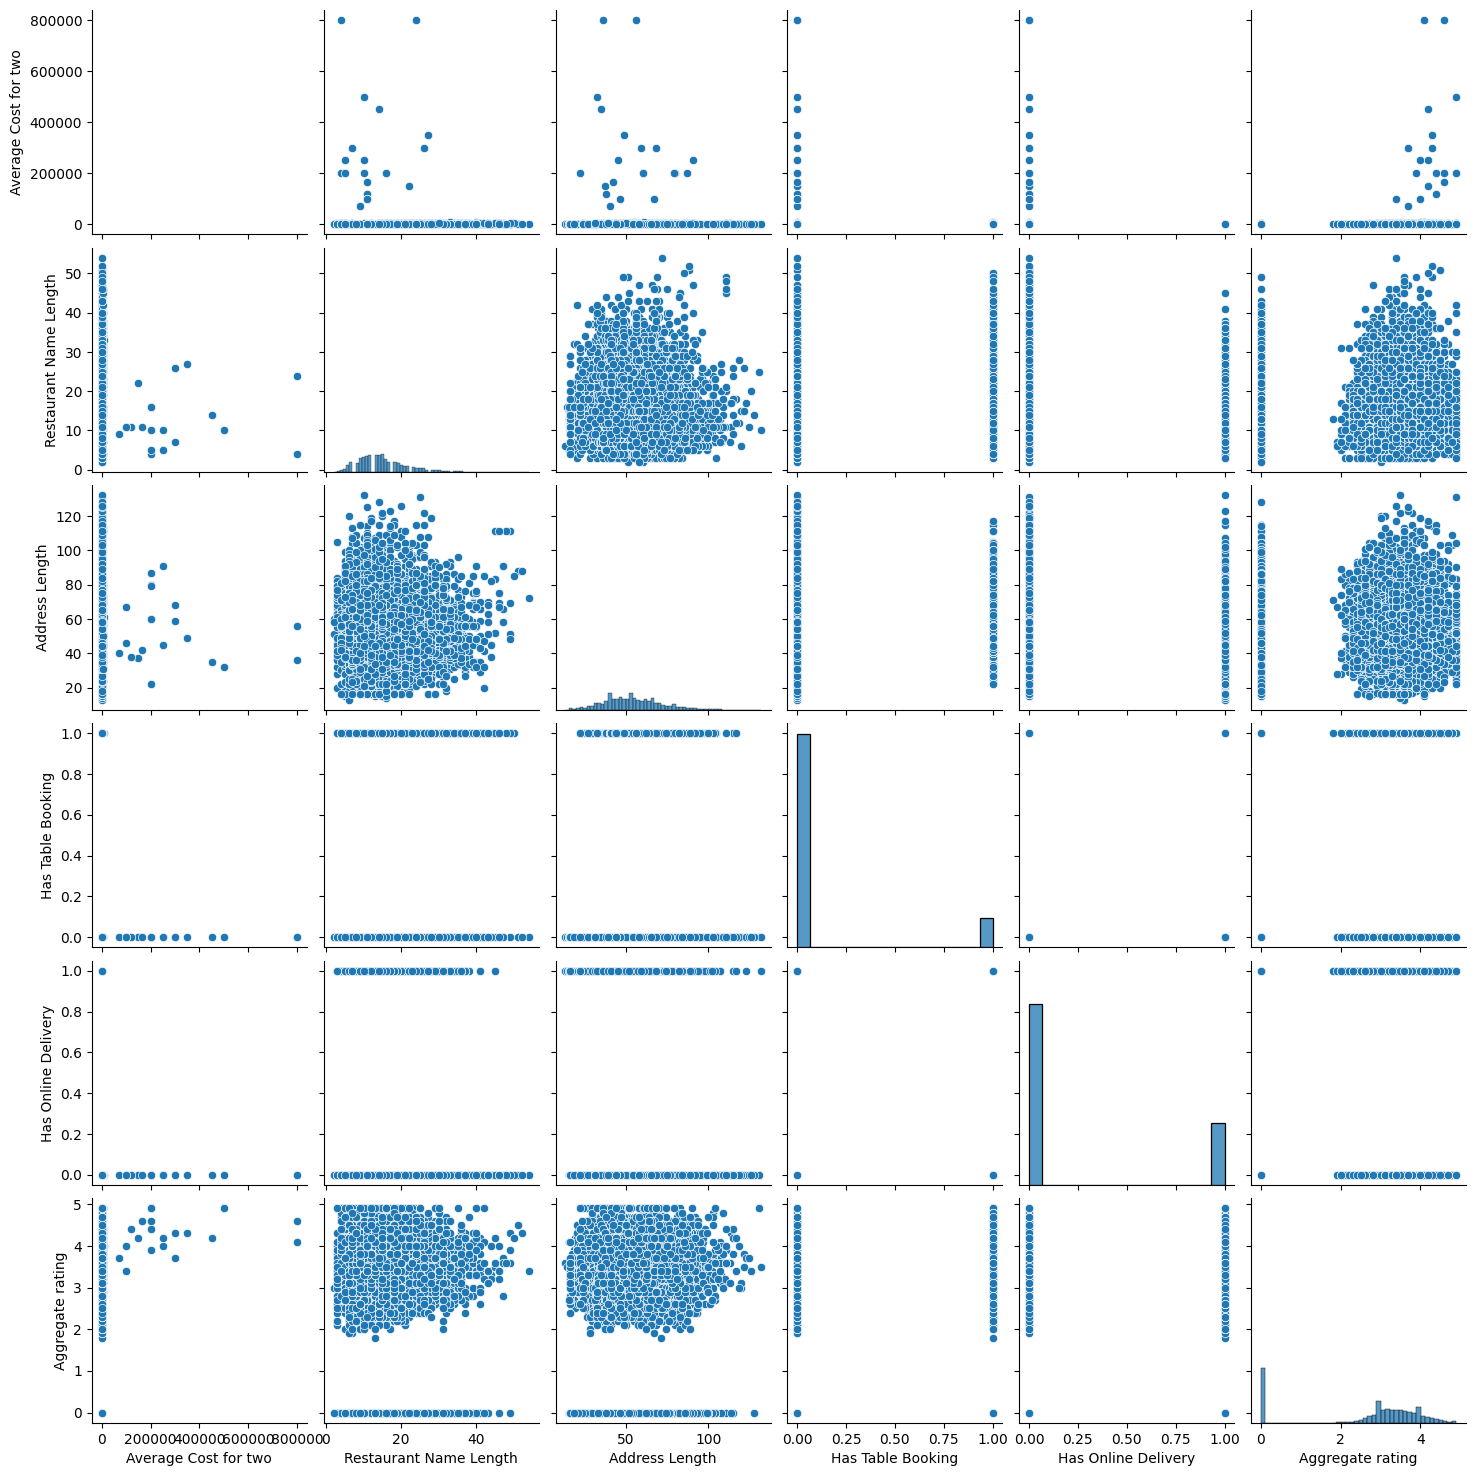

In [ ]:
sns.pairplot(df[['Average Cost for two', 'Restaurant Name Length', 'Address Length', 'Has Table Booking', 'Has Online Delivery', 'Aggregate rating']])
plt.show()


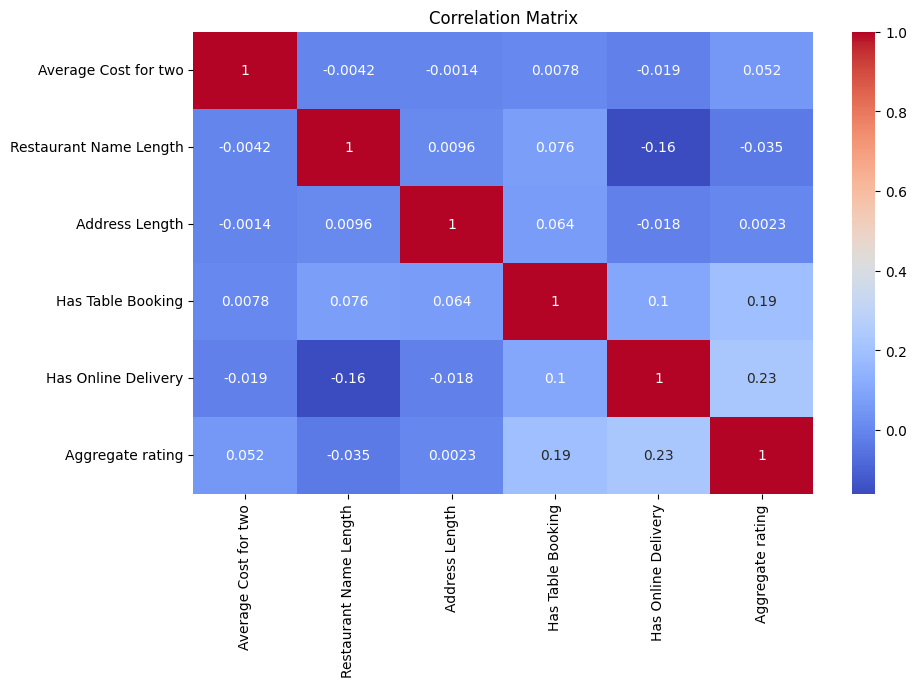

In [ ]:
corr = df[['Average Cost for two', 'Restaurant Name Length', 'Address Length', 'Has Table Booking', 'Has Online Delivery', 'Aggregate rating']].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [ ]:
y_pred_linear = linear_reg.predict(X_test)
y_pred_decision_tree = decision_tree_reg.predict(X_test)
y_pred_random_forest = random_forest_reg.predict(X_test)


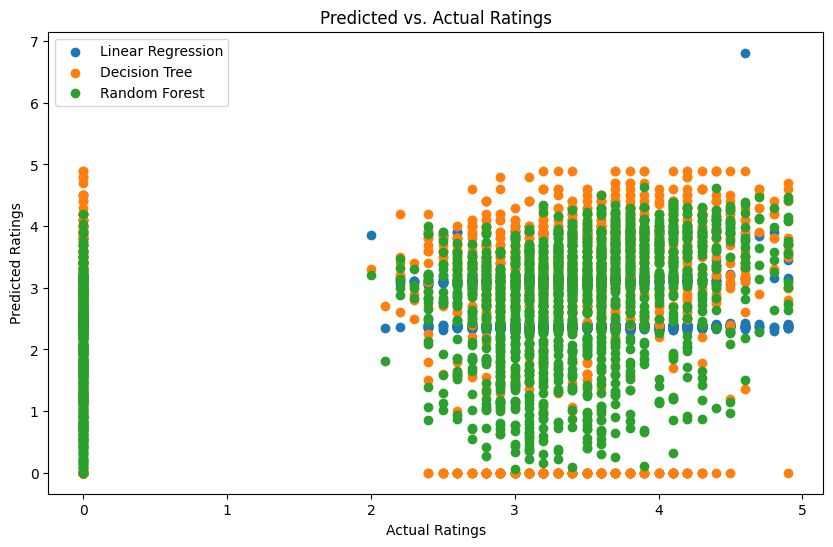

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_linear, label='Linear Regression')
plt.scatter(y_test, y_pred_decision_tree, label='Decision Tree')
plt.scatter(y_test, y_pred_random_forest, label='Random Forest')
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.legend()
plt.title('Predicted vs. Actual Ratings')
plt.show()
